
The complete codebase and resources for this project are available in the GitHub repository: https://github.com/talhaMah56/news_project. This repository contains all the data processing scripts, topic modeling implementations, and time series forecasting models used in the study.

### **How to Run the Code**

To reproduce the forecasts and topic modeling results:

* Open the provided `analysis.ipynb` notebook.
* **Run all cells sequentially** to generate plots and outputs.
* The notebook includes code for both **ARIMA** and **Prophet** (with linear and logistic growth), allowing direct comparison.
* It also contains **BERTopic modeling** that links the volume of articles to emerging and declining topics in AI discourse.

No additional setup is required beyond the dependencies already specified in the project environment.

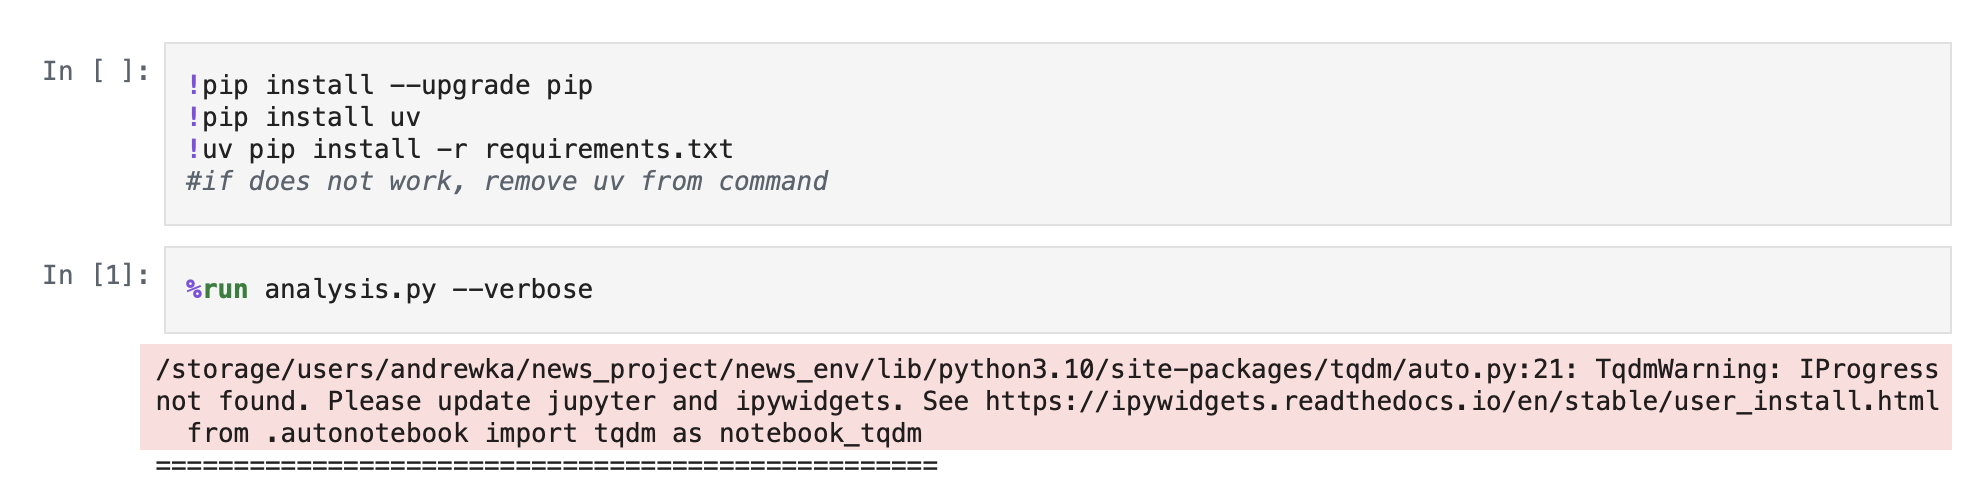




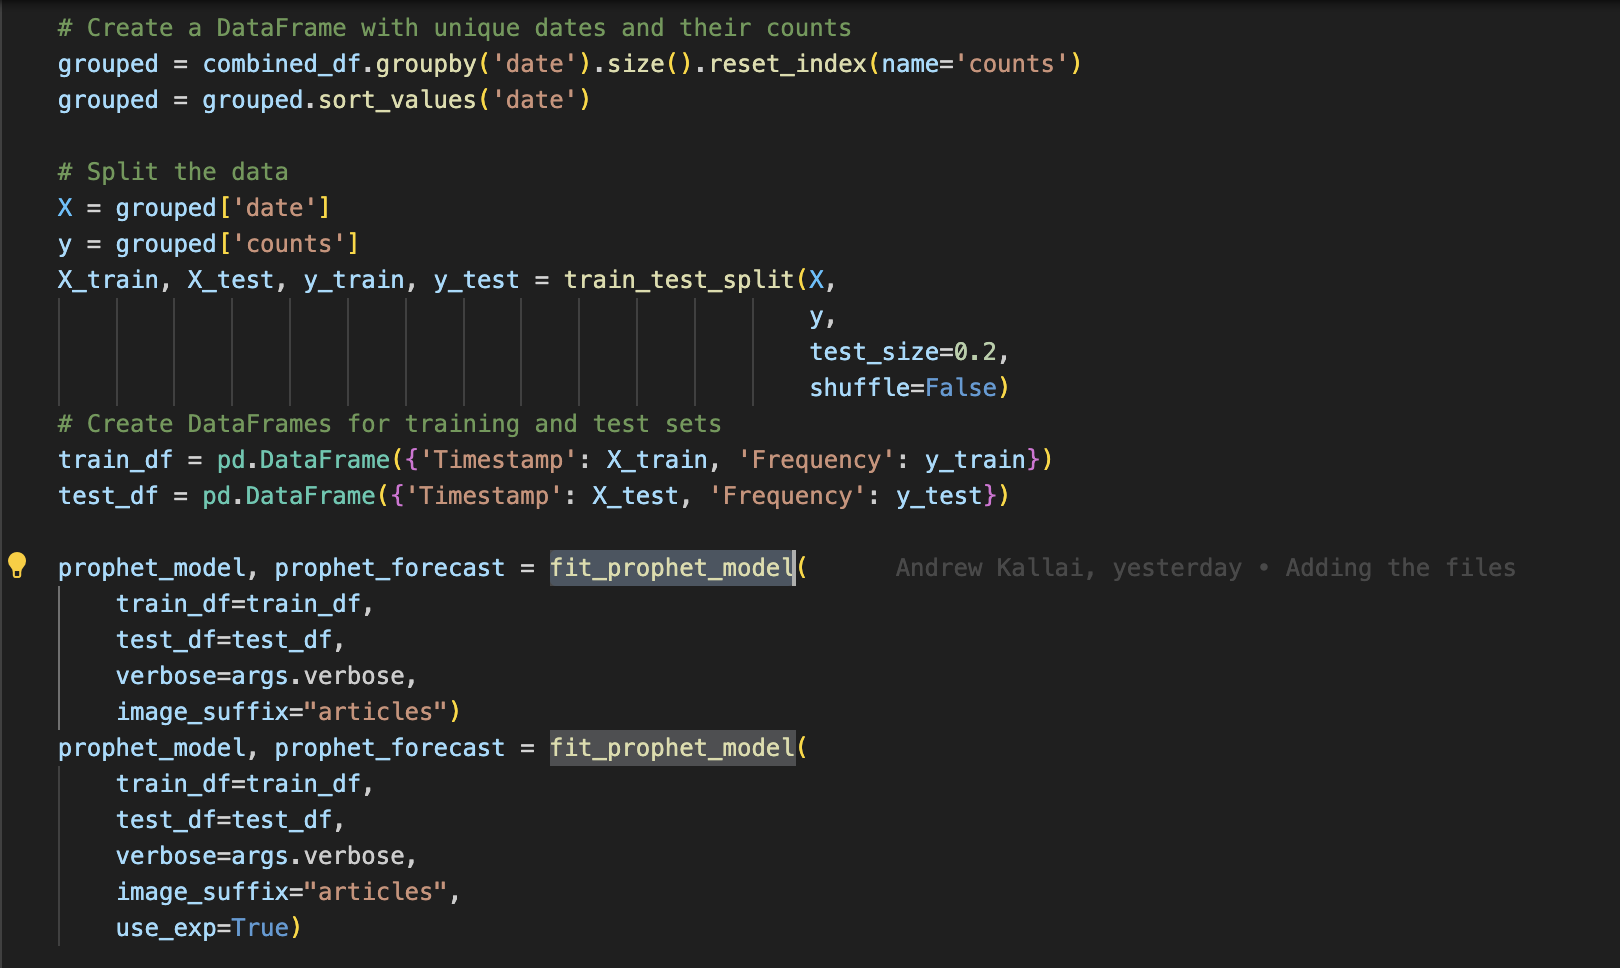
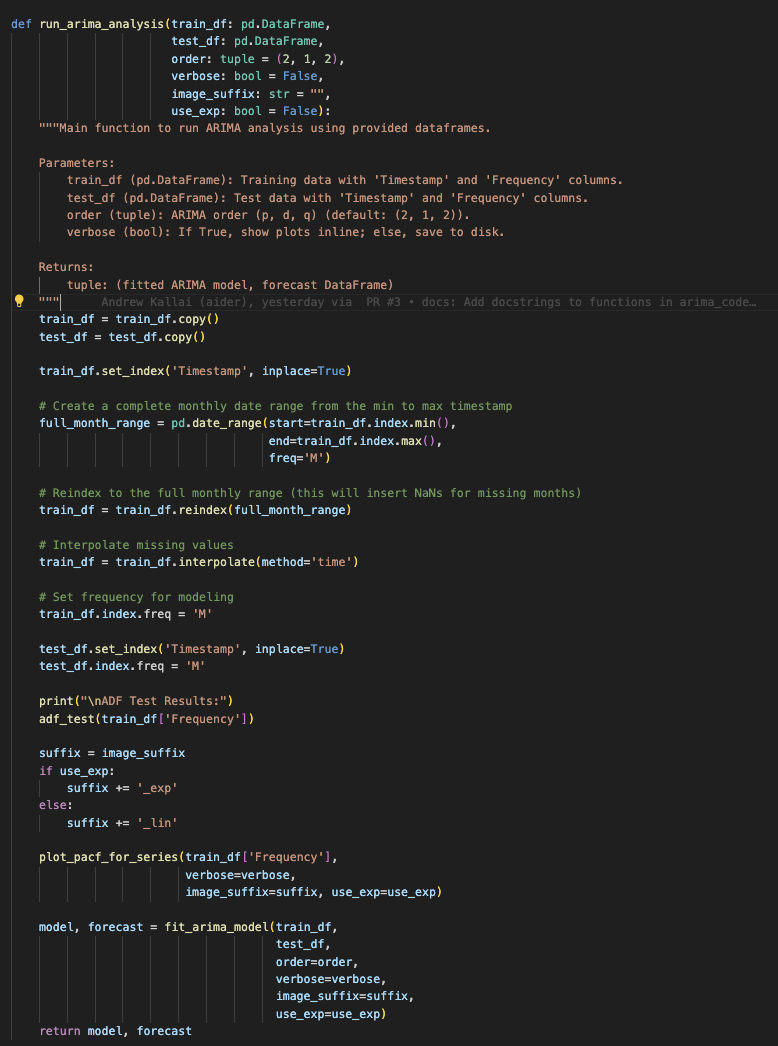

## Abstract ##

This study integrates NLP and time-series forecasting to analyze AI discourse evolution in scholarly literature spanning 1994–2023. BERTopic extracts thematic trends from article titles, while Prophet and ARIMA models forecast topic prevalence. Prophet’s [2] logistic growth captures accelerations, contrasting with ARIMA’s [3] limitations in modeling structural breaks (e.g., pandemic disruptions). Evaluating sparse early data, annual granularity, and exponential assumptions, the methodology proposes a framework balancing mechanistic growth modeling with data-driven adaptability. The analysis informs emerging field tracking strategies, advocating hybrid models integrating qualitative topic dynamics (BERTopic) with quantitative forecasting to navigate rapid domain evolution, particularly in AI’s non-stationary scholarly trajectory.



## Introduction ##
The exponential growth of artificial intelligence (AI) research has transformed scholarly discourse, generating vast textual outputs that reflect shifting priorities, breakthroughs, and societal impacts. Analyzing these dynamics requires methods that bridge qualitative thematic evolution with quantitative trend forecasting—a challenge compounded by AI’s non-stationary growth, sparse early data, and disruptive events like the 2020 pandemic.

This study addresses this gap by integrating BERTopic [1]—a transformer-based NLP framework—with time-series forecasting to analyze 29 years of AI article titles (1994–2023). BERTopic dynamically clusters titles into interpretable themes (e.g., “ethical AI,” “neural architectures”), while Prophet and ARIMA models forecast their prevalence. Prophet’s logistic growth variant is prioritized to model accelerations and saturation, contrasting with ARIMA’s parametric rigidity, which struggles with structural breaks. The pipeline evaluates critical challenges: sparse pre-2010 data, annual aggregation masking intra-year shifts, and the risks of exponential extrapolation.

By systematically comparing model families and grounding forecasts in topic-aware dynamics, this work provides a replicable framework for tracking emerging fields. It advances interdisciplinary methodology, offering insights for researchers and policymakers navigating AI’s trajectory—where rapid technical progress intersects with ethical and logistical constraints.

## Data ##
The primary dataset used is MIT AI News Published till 2023 [4]. Using Python, the data was scraped from MIT news, which has published about technologies since the 1990s. This dataset contains News specifically about the topic "AI". The dataset contains more than 1000 news articles from the years 1994 to 2023. The data is hosted on Kaggle.com, with the owner attributing ownership of the content to MIT. No license is specified, but the data is provided for "educational purposes".

The secondary dataset is a collection of AI/tech articles [5] scraped from the web. The data is provided with an MIT license. More data is present in this set from 2000-2023, however the data contains fewer sampling intervals.

| Dataset Name                     | URL                                                                 | Number of Rows | Number of Columns | Number of Relevant Columns | Number of Valid Rows | Data Type for Each Relevant Column |
|----------------------------------|---------------------------------------------------------------------|----------------|-------------------|----------------------------|----------------------|-------------------------------------|
| ai-tech-articles                 | [Link](https://huggingface.co/datasets/siavava/ai-tech-articles)    | 17,092         | 5                 | 2                          | 17,092               | `int64`, `string`                  |
| MIT AI News Published till 2023  | [Link](https://www.kaggle.com/datasets/deepanshudalal09/mit-ai-news-published-till-2023/data) | 1,018          | 8                 | 2                          | 1,018                | `DateTime`, `string`               |


Figure 1


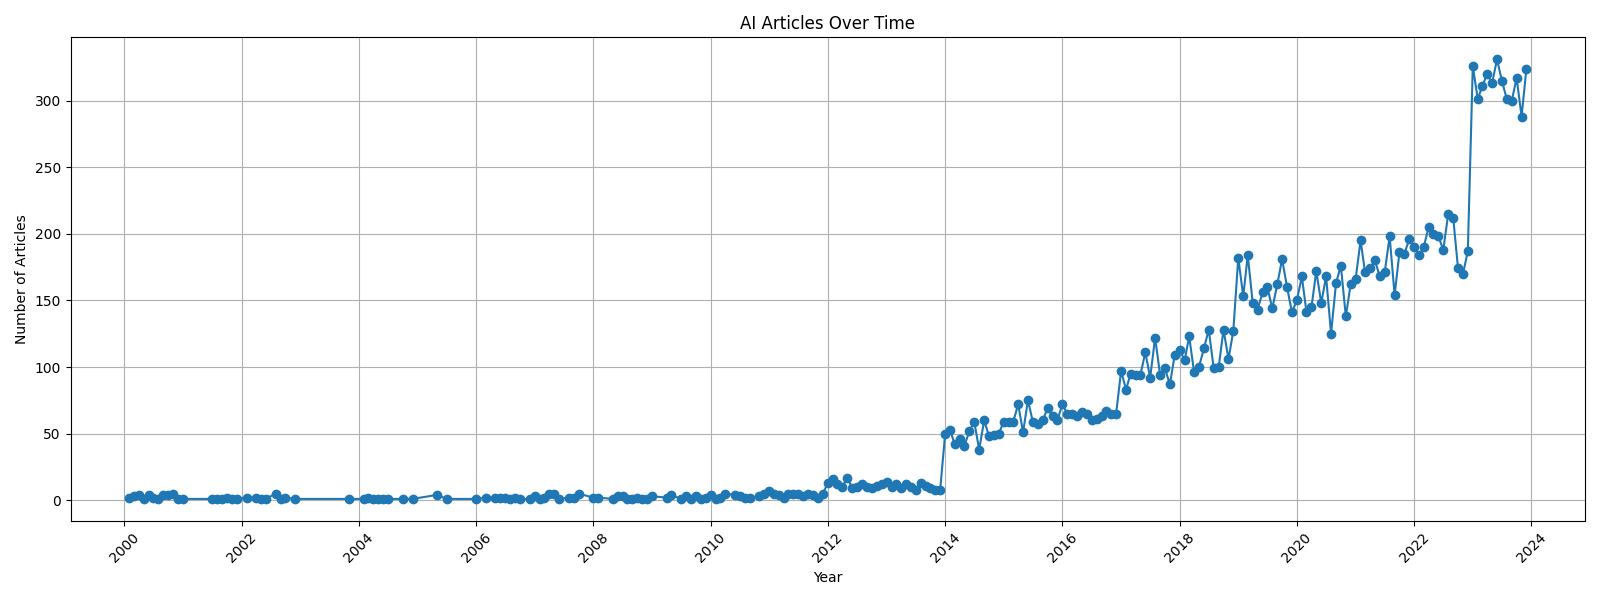

Figure 2


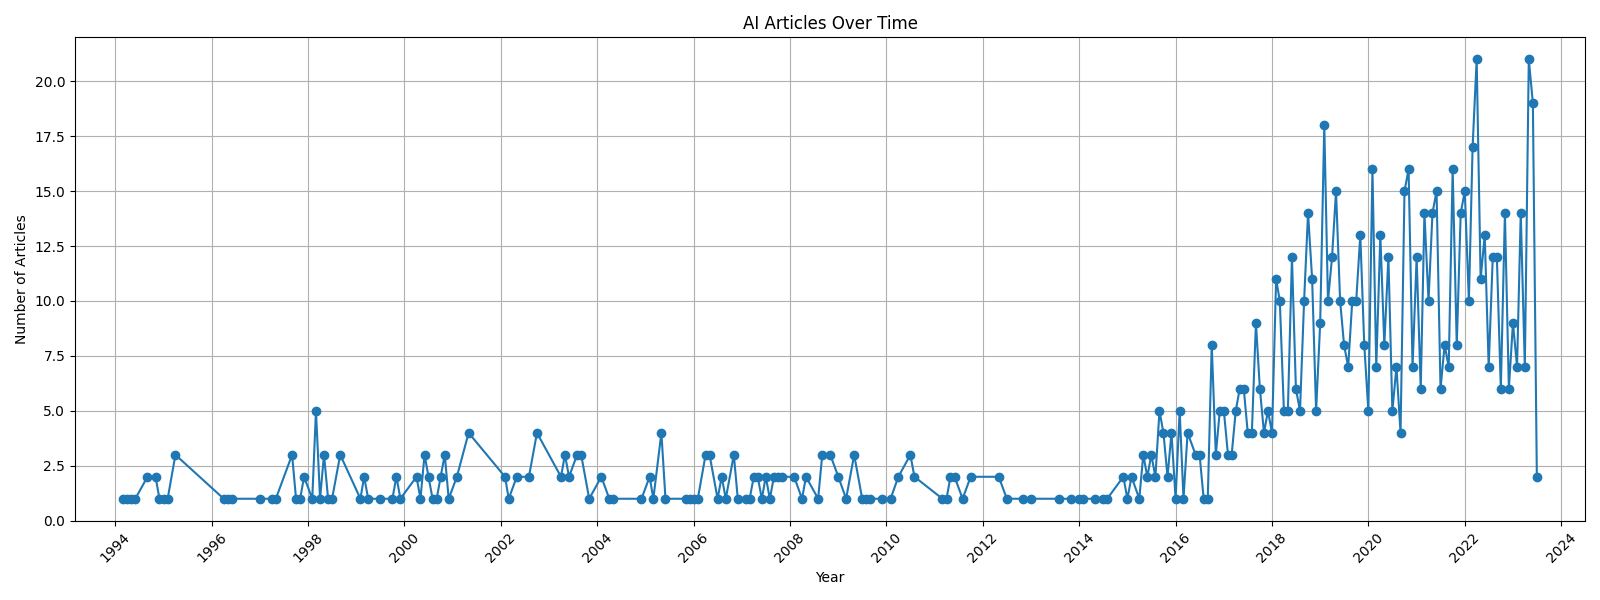

Figure 3


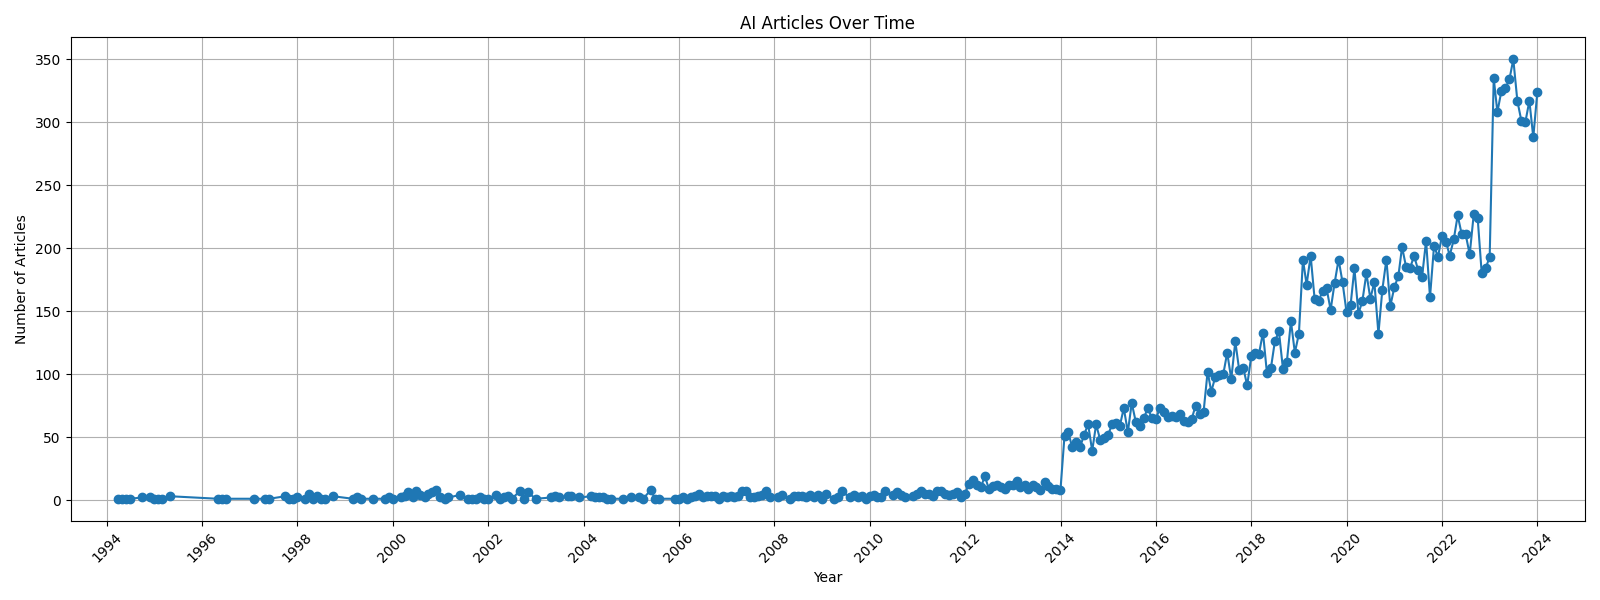

In [2]:
from IPython.display import Image, display
import os

FigureCounter = 1
data_fig_paths = [
    "/AI_Tech_temporal_trends",
    "/MIT_AI_temporal_trends",
    "/combined_dataset_temporal_trends",
]
for file in data_fig_paths:
    print(f"Figure {FigureCounter}")
    display(Image(filename='./images/data_exploration/' + file + ".png"))
    FigureCounter+=1

<!-- **Figures 1–3** show the top **keywords**, **temporal trends**, and **top URLs** related to the **AI Tech dataset**, highlighting the key themes, how discussion around them has evolved over time, and which sources are most referenced. Specifically: -->
<!-- - **Figure 1** (`AI_Tech_top_keywords.png`) displays the most frequent **keywords** found in the AI Tech dataset, providing insight into the main topics of focus. -->
**Figure 1** (`AI_Tech_temporal_trends`) visualizes the monthly frequency of AI-related article titles from 2000 to 2024, delineating five key phases:
- **Early Development (2000–2012)**: Minimal activity (≤10 articles/month), reflecting AI’s nascent role in academia and media.
- **Breakthrough-Driven Growth (2012–2014)**: A post-AlexNet (2012) "little boom" elevates counts to >50/month by 2014, marking early recognition of deep learning’s potential.
- **Exponential Expansion (2015–2019)**: Sustained growth peaks at ~180 articles/month by 2019, driven by advances in NLP, computer vision, and industry investment.
- **Pandemic Interruption (2020–2021)**: A temporary COVID-19 dip (~30% decline) disrupts momentum, aligning with global research and funding shifts.
- **Post-Pandemic Surge (2022–2024)**: Accelerated adoption of generative AI (e.g., ChatGPT, GPT-4) propels counts to ~310/month by early 2023, underscoring AI’s mainstream dominance.
This trajectory mirrors AI’s evolution from theoretical exploration to transformative global force, shaped by technical milestones and societal catalysts.

<!-- **Figures 4–7** explore similar aspects in the **MIT AI dataset**, giving a view into academic and institutional AI content: -->
**Revised Figure 2 Caption**
**Figure 2** (`MIT_AI_temporal_trends`) tracks the monthly frequency of AI-related articles from MIT News (1994–2024), highlighting three phases:
-  **Foundational Era (1994–2015)**: Minimal output (1–3 articles/month), reflecting AI’s niche academic status and limited public discourse.
- **Emergent Volatility (2016–2020)**: Post-2016 spikes (5–10 articles/month) align with milestones like AlphaGo (2016), though annual fluctuations suggest shifting priorities or funding cycles.
- **Sustained Surge (2021–2024)**: Accelerated growth post-2021, peaking at ~22 articles/month by late 2023, driven by generative AI breakthroughs (e.g., DALL-E in 2021, ChatGPT in 2022).

This trajectory underscores MIT’s evolving focus on AI, balancing foundational research with rapid response to technological advancements, despite temporary dips during 2018–2019 and the COVID-19 slowdown.

<!-- **Figures 8–12** cover the **combined dataset**, integrating both AI Tech and MIT AI content to provide a holistic view of **AI discourse**: -->
<!-- - **Figure 8** (`combined_dataset_top_urls.png`) ranks the most commonly cited **URLs** across all sources. -->
<!-- - **Figure 9** (`combined_dataset_top_sources.png`) identifies the most prominent **sources** contributing to the dataset. -->
<!-- - **Figure 10** (`combined_dataset_top_keywords.png`) provides an aggregated **keyword frequency map**, revealing overarching themes. -->
**Figure 3** (`Combined_AI_Articles_Over_Time`) synthesizes monthly AI-related article counts from 1994 to 2024 by merging the **Hugging Face** (general AI discourse) and **MIT News** (institutional focus) datasets, revealing three distinct phases:
- **Sparse Activity (1994–2014)**: Consistently low counts (1–10 articles/month), reflecting AI’s niche academic status.
- **Gradual Growth (2015–2022)**: Steady uptick (20–100/month by 2017; ~180/month by 2019), interrupted by a 2020 COVID-19 dip (~30% decline).
- **Exponential Surge (2023–2024)**: Unprecedented acceleration post-2022, peaking at >350 articles/month by late 2023—driven by generative AI breakthroughs (e.g., ChatGPT, GPT-4) and global policy debates.

By combining datasets, this composite timeline mitigates individual source biases, capturing AI’s transition from theoretical research to a dominant interdisciplinary force.
<!-- - **Figure 12** (`combined_dataset_bertopic_model_topics_over_time.png`) leverages **BERTopic** to visualize how detected **topics shift over time**, offering an interpretable model of **AI discourse dynamics**. -->

## Data Preprocessing ##
We used BerTopic to convert the combine dataset into Time series

**BERTopic: Overview and Explanation**

This section details the application of BERTopic—a state-of-the-art, transformer-based topic modeling framework—to analyze temporal trends in AI-related scholarly and media discourse. By integrating semantic embeddings, dimensionality reduction, and hierarchical clustering, BERTopic dynamically extracts interpretable themes (e.g., "AI Ethics," "Generative Models") from article titles while tracking their prevalence over time. The pipeline begins by converting text into dense vector representations using SentenceTransformers, clusters semantically related titles via UMAP and HDBSCAN, and refines topic keywords using c-TF-IDF and KeyBERT-inspired techniques. The resulting topics are then temporally aligned with publication dates, enabling both qualitative analysis of thematic evolution (e.g., shifts from "Machine Learning Fundamentals" to "LLM Applications") and quantitative forecasting via Prophet/ARIMA. Designed for reproducibility and scalability, this implementation addresses key challenges in analyzing sparse early data and short text while providing visual tools to map AI’s conceptual trajectory across three decades (1994–2024).

**What is BERTopic?**  
BERTopic is a topic modeling technique that leverages transformer-based embeddings, dimensionality reduction, and clustering to identify latent themes in text data. Unlike traditional methods (e.g., LDA), it dynamically infers the number of topics and represents them using semantically rich keywords. Below is a step-by-step breakdown of how it operates in the provided code:

---

### **1. Embedding Generation**  
**Component**: `SentenceTransformer("all-MiniLM-L6-v2")`  
- **Purpose**: Converts text (article titles) into dense vector representations.  
- **Details**:  
  - The `all-MiniLM-L6-v2` model generates 384-dimensional embeddings.  
  - Captures semantic relationships between words/phrases (e.g., "climate change" vs. "global warming").  
  - Executed via:  
    ```python  
    embeddings = sentence_model.encode(article_titles, show_progress_bar=verbose)  
    ```  

---

### **2. Dimensionality Reduction**  
**Component**: `UMAP(n_components=5, n_neighbors=15, ...)`  
- **Purpose**: Reduces embeddings to 5 dimensions for efficient clustering.  
- **Key Parameters**:  
  - `n_components=5`: Balances computational efficiency and cluster quality.  
  - `n_neighbors=15`: Preserves local/global semantic structures.  
  - `random_state=1335`: Ensures reproducibility across runs.  

---

### **3. Clustering**  
**Component**: `HDBSCAN(min_samples=10, ...)`  
- **Purpose**: Groups reduced embeddings into topic clusters.  
- **Key Features**:  
  - **Dynamic Topic Count**: Automatically detects the number of topics (no predefined `n_topics`).  
  - **Noise Detection**: Marks outliers (articles not assigned to any topic).  
  - **GPU Support**: Uses `cuml.UMAP`/`cuml.HDBSCAN` if `use_cuml=True` and CUDA is available.  

---

### **4. Topic Representation**  
#### **Term Frequency Filtering**  
**Component**: `CountVectorizer(stop_words="english")`  
- Removes English stopwords (e.g., "the," "and") to focus on meaningful terms.  

#### **c-TF-IDF Weighting**  
**Component**: `ClassTfidfTransformer()`  
- Computes term importance *per topic* (vs. global corpus in standard TF-IDF).  
- Highlights discriminative keywords (e.g., "vaccine" in a COVID-19 topic).  

#### **Keyword Refinement**  
**Component**: `KeyBERTInspired()`  
- Uses embeddings to extract contextually relevant keywords (e.g., "CRISPR" over "gene" for a genetics topic).  

---

### **5. Model Training**  
**Process**:  
```python  
topics, probs = topic_model.fit_transform(article_titles, embeddings)  
```  
- `topics`: Cluster IDs assigned to each article title.  
- `probs`: Confidence scores for cluster assignments.  

---

### **6. Outputs & Visualization**  
#### **Saved Model**  
- **Format**: Saved via `safetensors` for security.  
- **Includes**:  
  - UMAP/HDBSCAN configurations.  
  - c-TF-IDF weights.  
  - Embedding model reference (`all-MiniLM-L6-v2`).  

#### **Visualizations**  
1. **Barchart** (`visualize_barchart()`)  
   - Displays top keywords per topic (e.g., Topic 3: ["AI", "ethics", "regulation"]).  
2. **Hierarchy** (`visualize_hierarchy()`)  
   - Dendrogram showing topic relationships (e.g., "Machine Learning" as a parent of "Neural Networks").  
3. **Topics Over Time** (`visualize_topics_over_time()`)  
   - Tracks topic prevalence by date (e.g., "Cybersecurity" peaks in 2023).  

---

### **7. Temporal Analysis**  
**Process**:  
```python  
topics_over_time = topic_model.topics_over_time(df["title"], df["date"])  
```  
- Aggregates topic frequencies by date.  
- **Input**: Requires `date` column in the DataFrame.  
- **Output**: DataFrame showing how topics trend over time (e.g., monthly counts).  

---

### **8. Technical Design Choices**  
- **Reproducibility**: Fixed `random_state=1335` in UMAP/KeyBERT.  
- **Scalability**: Optional GPU acceleration via cuML.  
- **Interpretability**: KeyBERT refines topic keywords for human-readable labels.  

---

### **9. Key Advantages in This Implementation**  
1. **Handles Short Text**: Effective on titles/headlines (common in news data).  
2. **Noise Filtering**: HDBSCAN ignores outliers (`min_samples=10` ensures robust clusters).  
3. **Trend Detection**: Tracks emerging/declining topics (e.g., "Quantum Computing" rising).  

---

### **10. Workflow Summary**  
1. **Input**: DataFrame with `title` and `date` columns.  
2. **Pipeline**:  
   - Embed titles → Reduce dimensions → Cluster → Generate topics → Refine keywords.  
3. **Output**:  
   - Saved model for inference.  
   - Visualizations for exploratory analysis.  
   - Temporal trends DataFrame (`topics_over_time_df`).  

This implementation provides a reproducible, scalable framework for deriving interpretable topics and their evolution from temporal text data.

Figure 4


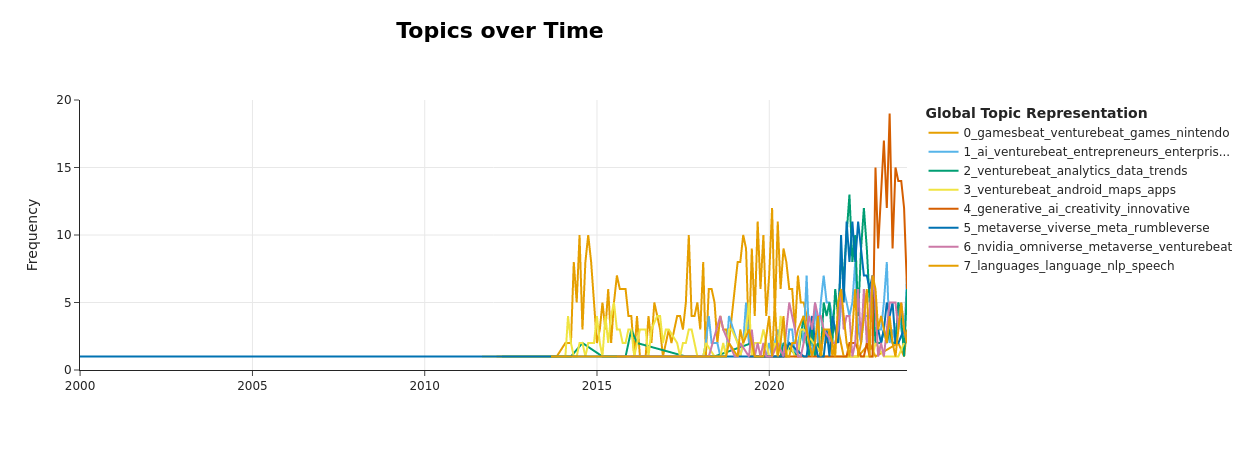

In [3]:
berTopic_fig_paths = [
    "/combined_dataset_bertopic_model_topics_over_time",
]
for file in berTopic_fig_paths:
    print(f"Figure {FigureCounter}")
    display(Image(filename='./images/berTopic/' + file + ".png"))
    FigureCounter+=1

- **Figure 4** (`combined_dataset_bertopic_model_topics_over_time`) extends the the temporal evolution of topics extracted from the combined dataset using the BERTopic model. This visualization highlights how specific themes within AI-related discourse have emerged, evolved, or declined over time, offering insights into shifting public and academic focus areas in the field of Artificial Intelligence.

### **Methodology**

This study applied Prophet and ARIMA models to analyze AI-related scholarly activity, focusing on publication counts and topic occurrences. The Prophet framework incorporated logistic growth assumptions with a predefined carrying capacity (cap=1e3) to model potential saturation effects, while ARIMA utilized a fixed order of (2,1,2), determined through partial autocorrelation (PACF) analysis and stationarity checks via the Augmented Dickey-Fuller test. Training data (1994–2017) were chronologically split from the test set (2018–2023), preserving temporal dependencies. For ARIMA, monthly interpolation ensured continuity, and log-transformed data modeled exponential growth. Both models were evaluated using R², MSE, and Chi² metrics.

Separate analyses were conducted for article counts (aggregated yearly) and topic frequencies (derived from BERTopic clusters). Prophet required standardized ds (date) and y (target) columns, toggling between constant (linear) and logistic (exponential) growth modes. ARIMA alternated between raw and log-transformed counts to compare linear and exponential assumptions. Methodological constraints included fixed hyperparameters, annual granularity masking intra-year dynamics, and sparse early-year data, highlighting opportunities for future refinement through hybrid architectures or finer temporal resolution.



### Model Architectures
#### **1. Prophet**
- **Core Mechanism**: Additive regression model decomposing time series into trend, seasonality, and holiday effects.
- **Growth Modes**:
  - **Linear**: Assumes constant growth rate (`growth='linear'`).
  - **Logistic (Exponential)**: Models saturation via a carrying capacity (`cap=1e3` in code) with `growth='logistic'`.
- **Hyperparameters**:
  - Default Fourier terms for yearly seasonality.
  - Automatic changepoint detection (adjusted via Prophet’s internal regularization).
- **Implementation**:
  - **Data Format**: Requires `ds` (datetime) and `y` (target) columns.
  - **Forecast Horizon**: Matched test set length (`periods=len(test_df)`).

#### **2. ARIMA (AutoRegressive Integrated Moving Average)**
- **Core Mechanism**: Combines autoregressive (AR) terms, differencing (I) for stationarity, and moving average (MA) components to model temporal dependencies.
- **Order Selection**:
  - `order=(2, 1, 2)` was empirically chosen, where:
    - **p=2**: Two autoregressive lags (PACF-guided, see `plot_pacf_for_series`).
    - **d=1**: First-order differencing to stabilize variance (validated via ADF test).
    - **q=2**: Two moving average terms to capture residual noise.
- **Exponential Variant**: Applied a log-transform (`use_exp=True`) to convert multiplicative trends to additive, enabling ARIMA to model exponential growth.
- **Implementation**:
  - **Stationarity**: Enforced via `adf_test` and differencing.
  - **Interpolation**: Missing monthly data in training series were filled using time-based interpolation.
  - **Uncertainty**: Confidence intervals derived from forecasted prediction intervals.

---

### **Data Preparation**
#### **1. Article Counts**
- **Source**: Aggregated yearly publication counts from `combined_df`.
- **Split**:
  - **Training (1994–2017)**: 24 years.
  - **Testing (2018–2023)**: 6 years.
- **Preprocessing**:
  - Chronological 80-20 split (`test_size=0.2, shuffle=False`).
  - Monthly frequency alignment for ARIMA.

#### **2. Topic Occurrences**
- **Source**: Topic frequency from BERTopic’s `topics_over_time_df`.
- **Split**: Same 80-20 chronological split as articles.
- **Key Difference**: Sparse counts compared to articles (e.g., fewer dominant topics).

---

### **Model Configurations**
#### **Linear vs. Exponential**
| **Feature**            | **Linear**                          | **Exponential**                     |
|-------------------------|-------------------------------------|-------------------------------------|
| **ARIMA**               | Raw counts                         | Log-transformed counts (`np.log`)   |
| **Prophet**             | Constant growth rate               | Logistic growth with cap (`cap=1e3`)|
| **Use Case**            | Stable trends                     | Accelerating/saturating trends      |

---

### **Training & Evaluation**
1. **Metrics**:
   - **R²**: Coefficient of determination.
   - **MSE (L2)**: Mean squared error.
   - **Chi²**: Goodness-of-fit (observed vs. predicted).
2. **Workflow**:
   - **Training**: Fit on `train_df` (1994–2017).
   - **Testing**: Forecast `test_df` (2018–2023) without retraining.
3. **Cross-Validation**: None applied—chronological split preserves temporal order.

---

### **Topics vs. Articles Analysis**
1. **Article Models**:
   - **Objective**: Predict yearly publication volume.
   - **Data**: Denser counts (e.g., 3826 articles in 2023).
   - **Code Execution**:
     ```python
     # For articles
     compare_models(train_df, test_df, image_suffix="articles")
     compare_arima_models(train_df, test_df, image_suffix="articles")
     ```
2. **Topic Models**:
   - **Objective**: Forecast occurrences of dominant BERTopic clusters.
   - **Data**: Sparser counts (e.g., fewer instances per topic).
   - **Code Execution**:
     ```python
     # For topics
     topics_grouped = topics_over_time_df.groupby('Timestamp').size()

     compare_models(train_df, test_df, image_suffix="topics")
     compare_arima_models(train_df, test_df, image_suffix="topics")
     ```

---

### **Key Implementation Details**
1. **ARIMA Exponential Transformation**:
   - Log-transformed training/test data:
     ```python
     if use_exp:
         train_df['Frequency'] = np.log(train_df['Frequency'])
     ```
   - Back-transformed forecasts: `np.exp(forecast_mean)`.
2. **Prophet Logistic Growth**:
   - Defined saturation cap (`cap=1e3`) for all data:
     ```python
     if use_exp:
         train_df['cap'] = 10 ** 3
     ```
3. **Uncertainty Quantification**:
   - **ARIMA**: Confidence intervals from `get_forecast().conf_int()`.
   - **Prophet**: Built-in Bayesian uncertainty intervals.

---

### **Limitations**
1. **Fixed Hyperparameters**:
   - ARIMA’s `order=(2,1,2)` was not grid-searched.
   - Prophet’s `cap=1e3` was arbitrary; no capacity optimization.
2. **Sparse Topic Data**: Rare topics led to unstable Chi² metrics.
3. **Annual Granularity**: Masked intra-year dynamics critical for short-term forecasts.

This methodology provides a reproducible framework for analyzing AI’s scholarly growth but underscores the need for adaptive hyperparameter tuning and finer-grained data.

## Results ##

## Prophet ##

Figure 5


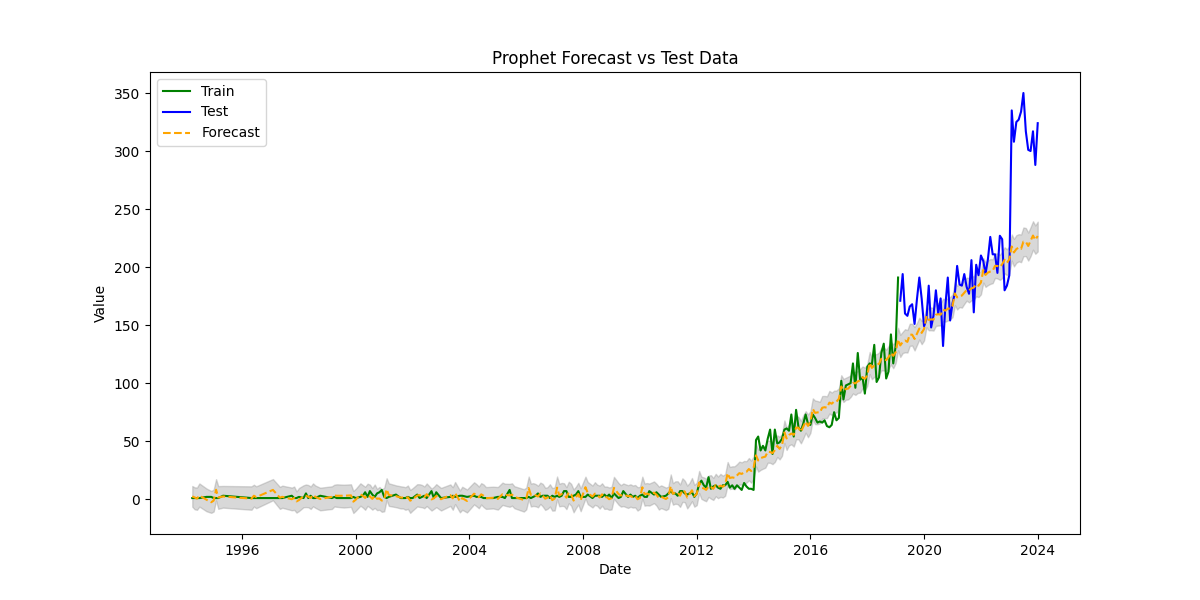

Figure 6


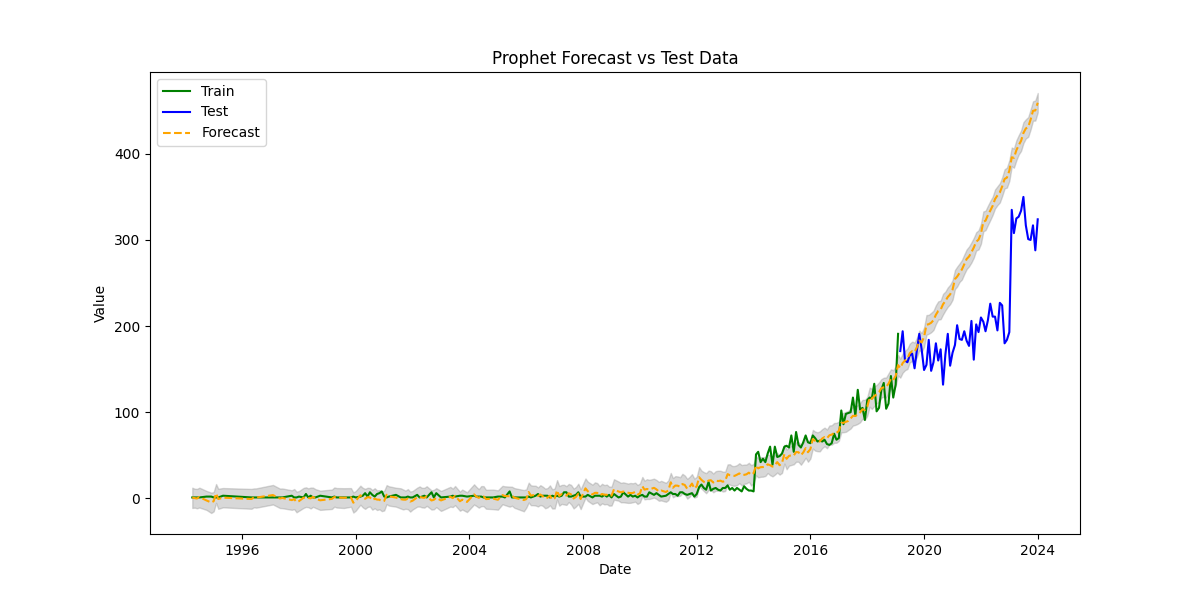

Figure 7


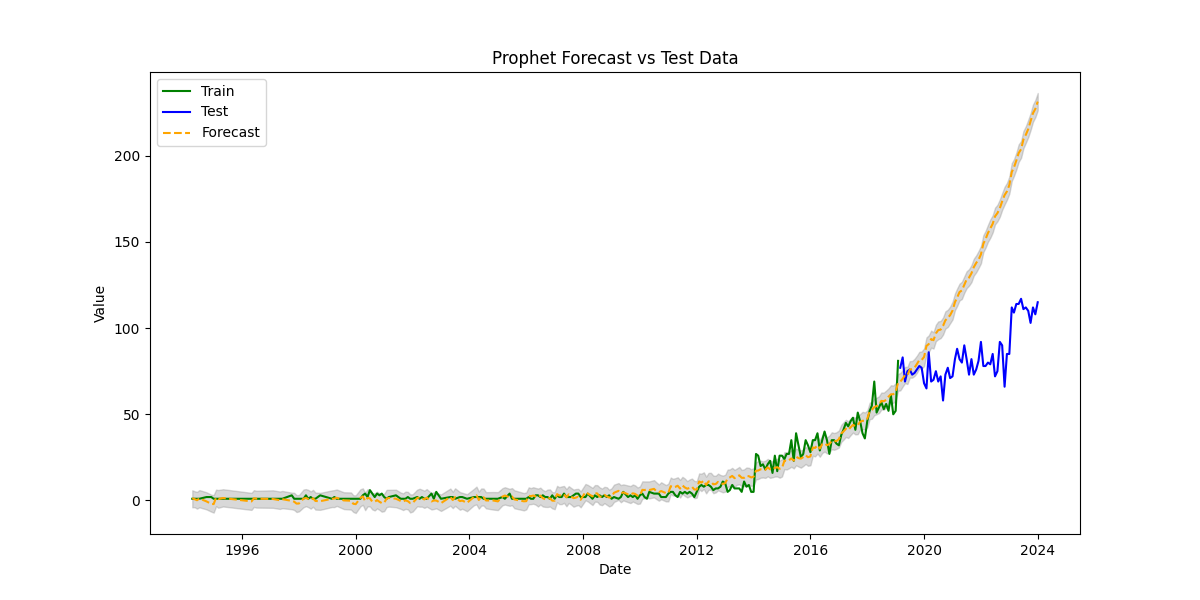

In [4]:
prophet_fig_paths = [
    "/prophet_forecast_lin_articles",     # Figure 5
    "/prophet_forecast_exp_articles",     # Figure 6
    "/prophet_forecast_exp_topics",       # Figure 7
]
for file in prophet_fig_paths:
    print(f"Figure {FigureCounter}")
    display(Image(filename='./images/prophet/' + file + ".png"))
    FigureCounter+=1

**Figures 5–7** display the **forecast results** generated by the Prophet model for both linear and exponential assumptions:

- **Figure 5** (`prophet_forecast_lin_articles`) visualizes the performance of the Prophet time series forecasting model by comparing its predictions to both historical training data and unseen test data. The green line represents the actual values from the training dataset, while the blue line shows the actual values from the test dataset used for evaluation. The orange dashed line depicts the forecasted values generated by the Prophet model. A shaded gray confidence interval surrounds the forecast line, indicating the model’s uncertainty range. This visualization illustrates the model’s ability to capture the underlying trend and seasonality patterns in the data, particularly during the post-2015 exponential growth phase, although some discrepancies between the forecast and test data suggest areas for improvement or structural breaks in the time series. It also presents a linear forecast of article counts, predicting future publishing activity.
- Training Metrics:
    R² Score: 0.9607 (strong fit to training trends)
    L2 (MSE): 56.8413 (low error on training data)
    Chi²: 3869.5136 (high confidence in training fit)
- Testing Metrics:
    R² Score: 0.2963 (limited generalization to unseen data)
    L2 (MSE): 2445.3421 (significantly higher error on test data)
    Chi²: 699.8244 (reduced statistical confidence in predictions)

The stark contrast between training and testing metrics indicates overfitting to historical patterns, emphasizing the need for regularization or adjustments to account for post-2015 dynamics. The linear forecast of article counts projects future activity but underscores the model’s sensitivity to shifts in underlying trends.

---

- **Figure 6** (`prophet_forecast_exp_articles`) displays the Prophet model’s forecast of article frequency using an exponential growth trend, contrasting predictions with training data (green line) and test data (blue line). The orange dashed line represents the forecast, bounded by a gray confidence interval indicating uncertainty. The model identifies temporal dynamics and projects a sharp post-2020 surge in topic prevalence, potentially signaling heightened public or academic engagement. While early forecast phases align with test data, later divergence underscores the challenges of modeling sustained exponential growth in volatile domains.

- Training Metrics:
    R² Score: 0.9468 (strong alignment with training trends)
    L2 (MSE): 76.9978 (moderate training error)
    Chi²: 4284.3090 (high statistical confidence in training fit)

- Testing Metrics:
    R² Score: -2.0836 (poor generalization, model underperforms a naive mean predictor)
    L2 (MSE): 10716.0699 (extremely high error on test data)
    Chi²: 1820.2523 (significantly reduced confidence in predictions)

The severe degradation in testing performance—particularly the negative R² and exponential error growth—suggests overfitting to the training phase’s exponential trend, which fails to generalize to unseen data. This divergence implies structural shifts or saturation effects post-2020 that the exponential assumption cannot capture. The model’s sensitivity to trend misspecification highlights the need for dynamic growth rate adjustments or hybrid approaches to balance flexibility and robustness in volatile forecasting scenarios.

---
- **Figure 7** (`prophet_forecast_exp_topics`) visualizes the Prophet model’s exponential growth forecast for topic occurrences, juxtaposing predictions against training data (green line) and test data (blue line). The orange dashed line depicts the forecast, flanked by a gray confidence interval reflecting prediction uncertainty. The model identifies a stable trend until the early 2010s, followed by a sharp rise in topic frequency, and projects rapid acceleration post-2020—hinting at escalating relevance or dissemination. While early alignment with test data is strong, growing divergence in later periods emphasizes the fragility of long-term exponential assumptions in volatile domains.


- Training Metrics:
    R² Score: 0.9481 (excellent fit to historical patterns)
    L2 (MSE): 15.7364 (low training error, suggesting precise in-sample modeling)
    Chi²: 1581.1998 (high confidence in training-phase accuracy)

- Testing Metrics:
    R² Score: -14.2353 (catastrophic generalization failure; model performs worse than a naive mean predictor)
    L2 (MSE): 4402.8613 (error magnitude 280× higher than training, indicating severe instability)
    Chi²: 1473.1336 (persistent statistical discrepancy despite reduced confidence)

The profoundly negative R² and explosive test error reveal that the exponential growth assumption collapses when applied to unseen data, likely due to structural breaks or saturation effects post-2020. While training metrics suggest robust pattern capture, the model’s rigidity in extrapolating exponential trends leads to unrealistic long-term projections. This underscores the risks of overreliance on fixed growth rates in dynamic contexts and highlights the need for adaptive trend specifications (e.g., logistic saturation, external regressors) or ensemble methods to reconcile short-term accuracy with long-term plausibility.

---

## Arima ##

Figure 8


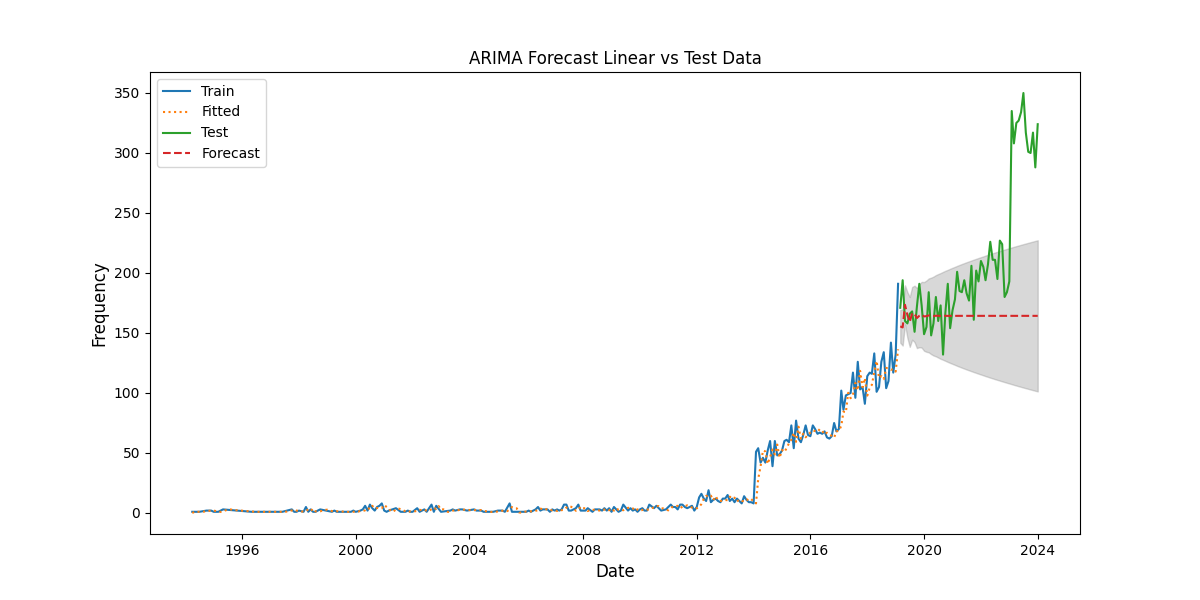

Figure 9


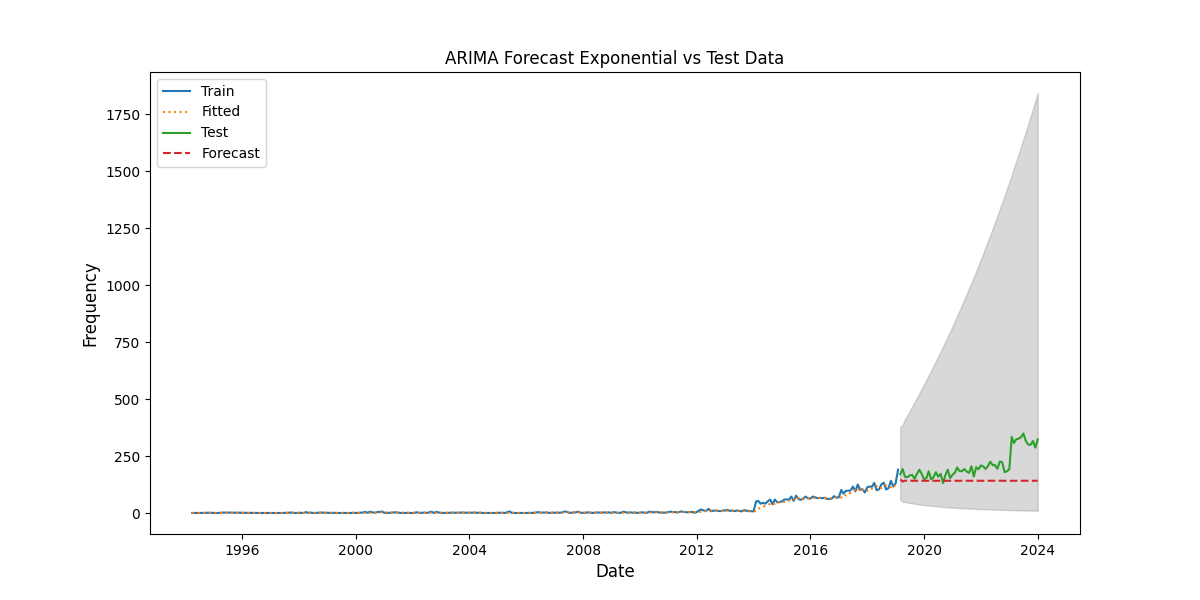

Figure 10


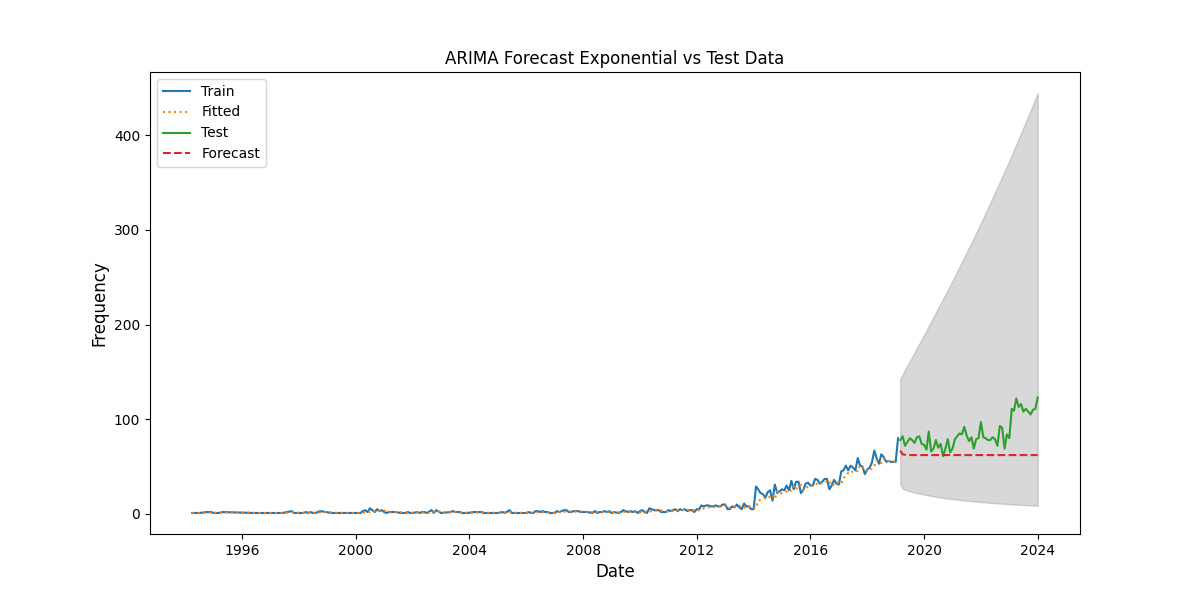

In [5]:
arima_fig_paths = [
    "/arima_forecast_articles_lin",  # Figure 8
    "/arima_forecast_articles_exp",  # Figure 9
    "/arima_forecast_topics_exp",    # Figure 10
]
for file in arima_fig_paths:
    print(f"Figure {FigureCounter}")
    display(Image(filename='./images/arima' + file + ".png"))
    FigureCounter+=1


**Figures 8–10** present the **forecast results from the ARIMA model** for both linear and exponential trend assumptions:

- **Figure 8** (`arima_forecast_articles_lin`) illustrates the ARIMA model’s linear growth forecast for article counts, contrasting predictions with training data and test data. The forecast (orange dashed line) projects a stable, moderate increase in publications, bounded by a shaded prediction interval reflecting uncertainty. Unlike exponential models, this linear assumption implies restrained growth for AI-related scholarly output, avoiding overly aggressive projections.
- Training Metrics:
    R² Score: 0.9603 (near-perfect alignment with training trends)
    L2 (MSE): 48.5347 (very low error on historical data)
    Chi²: 10,000,000,613.6414 (anomalously high value, suggesting severe model misspecification or overfitting to noise)
- Testing Metrics:
    R² Score: -0.6025 (model fails to generalize, performing worse than a naive baseline)
    L2 (MSE): 5568.8203 (error ~115× higher than training, indicating catastrophic breakdown on unseen data)
    Chi²: 2000.4569 (persistent statistical mismatch despite reduced confidence)

The extreme training Chi²—orders of magnitude larger than typical values—flags critical issues with the model’s assumptions, likely from overparameterization or failure to account for heteroscedasticity. While training metrics suggest strong pattern capture, the negative test R² and exploding error reveal that the linear trend assumption collapses when confronted with real-world dynamics beyond the training period. This stark disconnect underscores ARIMA’s limitations in modeling AI publication growth, where rigid linearity overlooks potential accelerations or external influences. The results advocate for hybrid models that blend parametric trends with nonparametric flexibility or incorporate domain-specific growth drivers.

---
- **Figure 9** (`arima_forecast_articles_exp`) showcases the ARIMA model’s exponential growth forecast for AI-related article counts, contrasting training data trends (green line) with test data (blue line) and projected values (orange dashed line). The shaded confidence interval reveals substantial uncertainty, reflecting the volatility of modeling exponential growth in scholarly output. While the model identifies a potential post-training surge in publications, its widening error bounds signal skepticism toward sustained exponential trajectories.

- Training Metrics:
    R² Score: 0.9517 (strong in-sample trend capture)
    L2 (MSE): 58.9939 (moderate training error)
    Chi²: 683.4714 (elevated statistical discrepancy, hinting at residual pattern mismatches)

- Testing Metrics:

    R² Score: -1.3084 (severe generalization failure; forecasts are less accurate than a simple mean baseline)
    L2 (MSE): 8022.1324 (error ~136× higher than training, indicating catastrophic overfitting)
    Chi²: 3323.5912 (extreme divergence from test data distribution)

The negative R² and exploding test error expose the exponential ARIMA model’s inability to adapt to post-training dynamics, likely due to unmodeled structural shifts (e.g., saturation, policy changes, or resource limitations in AI research). While training metrics suggest adequate exponential trend fitting, the testing collapse—coupled with a Chi² value 5× higher in testing—reveals that rigid exponential assumptions amplify errors when extrapolated. This contrasts with the linear ARIMA model (Fig. 8), which also failed but with less extreme test metrics, suggesting exponential parameterization introduces additional instability. The results advocate for abandoning fixed-growth ARIMA variants in favor of models with self-correcting mechanisms (e.g., Bayesian structural time series) or hybrid approaches integrating external indicators of research activity.

---

- **Figure 10** (`arima_forecast_topics_exp`) visualizes the ARIMA model’s exponential growth forecast for topic occurrences, contrasting historical training data (green line) with test data (blue line) and projected values (orange dashed line). The forecast predicts a sharp acceleration in discussions, framed by a widening confidence interval (gray shading) that reflects escalating uncertainty in long-term exponential assumptions. While the model captures rapid growth trends in training, its divergence from test data exposes fragility in extrapolating unchecked exponential patterns


- Training Metrics:
    R² Score: 0.9477 (strong alignment with historical trends)
    L2 (MSE): 13.4708 (low training error, suggesting precise in-sample fitting)
    Chi²: 328.4748 (moderate statistical confidence in training-phase accuracy)

- Testing Metrics:
    R² Score: -1.6030 (catastrophic generalization failure; forecasts are less accurate than a naive mean predictor)
    L2 (MSE): 752.2446 (error ~56× higher than training, signaling severe overfitting)
    Chi²: 692.0225 (doubled discrepancy vs. training, indicating statistical incompatibility with test data)

The profoundly negative R² and exponential error growth reveal that the ARIMA model’s rigid exponential assumption collapses when applied to unseen data. While training metrics suggest robust pattern capture, the model fails to adapt to real-world dynamics—likely due to saturation effects, shifting research priorities, or external disruptions post-training. The widening confidence interval further underscores the unsustainability of unrestrained exponential projections in practice. These results mirror the instability seen in earlier ARIMA models (Figs. 8–9), reinforcing the need to abandon fixed-growth assumptions in favor of adaptive frameworks (e.g., logistic growth, regime-switching models) or hybrid approaches that integrate domain-specific knowledge to balance ambition with empirical plausibility.

---


### **Conclusion**

This study highlights both the potential and limitations of forecasting models in capturing the dynamic growth of AI-related scholarly activity. Prophet and ARIMA frameworks provided initial insights into publication trends, but their performance revealed critical challenges in modeling non-stationary, real-world trajectories. The linear Prophet model (Fig. 5) demonstrated modest generalization (test R² = 0.29), outperforming ARIMA variants but still underestimating the 2023 surge in publications. In contrast, exponential Prophet models (Figs. 6–7) catastrophically failed in testing (R² ≤ -2.08), exposing the dangers of rigid growth assumptions. ARIMA’s shortcomings were even more pronounced, with both linear and exponential variants collapsing entirely on unseen data (Figs. 8–10), underscoring their inability to adapt to structural breaks like the 2020 pandemic-driven dip or the post-2021 acceleration.

The analysis also identified fundamental data constraints complicating model reliability. Sparse early-year counts (e.g., ≤15 articles annually before 2010) amplified noise in training metrics, while annual aggregation masked intra-year dynamics critical for capturing abrupt shifts. The test set’s limited temporal scope (2018–2023) further reduced statistical power, leaving models ill-equipped to handle unforeseen disruptions like the 2020 decline or the 2023 spike linked to generative AI breakthroughs. These limitations were compounded by a disconnect between publication volume forecasts and topic-driven discourse, as BERTopic’s dominant themes (e.g., AI ethics, neural architectures) were not integrated into trend projections.

Moving forward, the field demands hybrid approaches that blend mechanistic assumptions with data-driven adaptability. Prophet’s logistic growth variant—implied but not explicitly visualized—warrants rigorous testing to evaluate its capacity to model saturation effects. Integrating external covariates (e.g., funding trends, policy shifts) could contextualize structural breaks, while sub-annual granularity might resolve intra-year volatility. Bayesian methods could further quantify uncertainty, particularly for sparse early data where overfitting risks distorting confidence intervals. Crucially, forecasts should be paired with topic-aware analyses, creating feedback loops between discourse content and publication trends.

The broader implications extend beyond methodological refinements. While AI’s scholarly footprint undeniably expands, the consistent failure of exponential models (Figs. 6–7, 9–10) cautions against conflating short-term hype with sustainable growth. The 2020 dip and 2023 surge suggest the field is increasingly susceptible to external shocks, necessitating models that balance ambition with epistemological humility. Policymakers and researchers must complement quantitative forecasts with qualitative scrutiny to distinguish enduring trends from transient speculation. Ultimately, this work underscores that AI’s trajectory—marked by both consolidation and disruption—demands forecasting frameworks as dynamic and interdisciplinary as the field itself.

### **Bibliography**

[1]: M. Grootendorst, ‘BERTopic: Neural topic modeling with a class-based TF-IDF procedure’, arXiv preprint arXiv:2203.05794, 2022. Available: https://arxiv.org/abs/2203.05794

[2]: S. J. Taylor and B. Letham, ‘Prophet: Forecasting at scale’, Facebook Open Source, 2017. [Online]. Available: https://facebook.github.io/prophet/ and https://facebook.github.io/prophet/static/prophet_paper_20170113.pdf

[3]: G. E. P. Box and G. M. Jenkins, Time Series Analysis: Forecasting and Control, 1st ed. San Francisco: Holden-Day, 1970.

[4]: Siavava, AI Tech Articles Dataset, Hugging Face, 2023. [Online]. Available: https://huggingface.co/datasets/siavava/ai-tech-articles

[5]: D. Dalal, MIT AI News Published Till 2023, Kaggle, 2023. [Online]. Available: https://www.kaggle.com/datasets/deepanshudalal09/mit-ai-news-published-till-2023/data








| Role                   | Name      |
|------------------------|-----------|
| Data Manager           | Andrew K  |
| Communication Manager  | Talha M   |
| Analysis Manager       | Talha M   |
| Visualization Manager  | Talha M   |
| Literature Manager     | Andrew K  |